In [1]:
!pip install opendatasets

In [2]:
!pip install torchinfo

In [3]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
import opendatasets as od

In [5]:
from pathlib import Path

data_dir = Path('Data')
data_dir.mkdir(parents=True, exist_ok=True)

In [6]:
od.download('https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset', data_dir=data_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: umerdaud
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset


100%|██████████| 219M/219M [00:01<00:00, 115MB/s]


## Data Preprocessing & Creating Custom data


In [7]:
import os

In [8]:
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}")

There are 1 directories, 0 images in Data
There are 1 directories, 0 images in Data/rice-image-dataset
There are 5 directories, 1 images in Data/rice-image-dataset/Rice_Image_Dataset
There are 0 directories, 15000 images in Data/rice-image-dataset/Rice_Image_Dataset/Ipsala
There are 0 directories, 15000 images in Data/rice-image-dataset/Rice_Image_Dataset/Karacadag
There are 0 directories, 15000 images in Data/rice-image-dataset/Rice_Image_Dataset/Jasmine
There are 0 directories, 15000 images in Data/rice-image-dataset/Rice_Image_Dataset/Arborio
There are 0 directories, 15000 images in Data/rice-image-dataset/Rice_Image_Dataset/Basmati


In [9]:
images_list = list(sorted(data_dir.glob('*/*/*/*.jpg')))
images_list

[PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (1).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (100).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (1000).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10000).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10001).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10002).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10003).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10004).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10005).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10006).jpg'),
 PosixPath('Data/rice-image-dataset/Rice_Image_Dataset/Arborio/A

## Visualizing some samples

In [10]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [11]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_random_samples(images, n : int = 6):
  random_img = random.sample(images, n)
  rows = 3
  cols = 2
  for i, img in enumerate(random_img):
    if i % 2 == 0:
      img = Image.open(img)
      transformed_img = simple_transform(img)
      img = np.asarray(img)
      plt.subplot(rows, cols, i+1)
      plt.title('Original Image')
      plt.axis(False)
      plt.imshow(img)
      plt.subplot(rows, cols, i+2)
      plt.title('transformed Image')
      plt.axis(False)
      plt.imshow(transformed_img.permute(1, 2, 0))

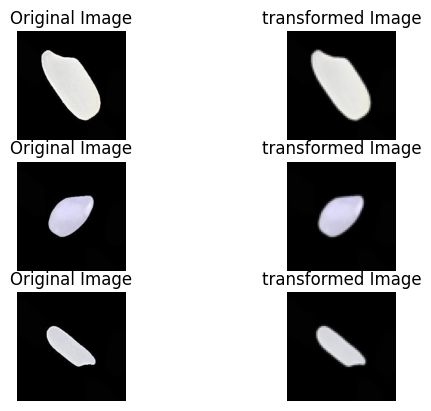

In [13]:
plot_random_samples(images_list)

## Creating Datasets and DataLoaders

In [57]:
data = data_dir / 'rice-image-dataset' / 'Rice_Image_Dataset'
data

PosixPath('Data/rice-image-dataset/Rice_Image_Dataset')

In [58]:
rice_data = datasets.ImageFolder(root= data, transform= simple_transform)
rice_data

Dataset ImageFolder
    Number of datapoints: 75000
    Root location: Data/rice-image-dataset/Rice_Image_Dataset
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [62]:
from torch.utils.data import random_split

train_split = int(0.75 * len(rice_data))
test_size = len(rice_data) - train_split

train_data, test_data = random_split(rice_data, [train_split, test_size])
len(train_data), len(test_data)

(56250, 18750)

In [63]:
train_data, test_data

(<torch.utils.data.dataset.Subset at 0x7e21cc2363e0>,
 <torch.utils.data.dataset.Subset at 0x7e20dfc1b460>)

In [64]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data, batch_size= BATCH_SIZE, shuffle= True)
test_dataloader = DataLoader(dataset= test_data, batch_size=BATCH_SIZE, shuffle= False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e20dfc18070>,
 <torch.utils.data.dataloader.DataLoader at 0x7e2066e4fbe0>)

In [65]:
images, label = next(iter(train_dataloader))
images.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [66]:
dir = data_dir / 'rice-image-dataset' / 'Rice_Image_Dataset'
dir

PosixPath('Data/rice-image-dataset/Rice_Image_Dataset')

In [67]:
#extracting class_names from rice data through `os.scandir()`

class_names = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [68]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Creating Tiny VGG Model

In [69]:
class TinyVGGModel(nn.Module):
  def __init__(self, input_shape,
               hidden_units, output_shape):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*13*13, out_features= output_shape)
    )

  def forward(self, x):
    return self.classifier(self.block_2(self.block_1(x)))

model_0 = TinyVGGModel(input_shape= 3, hidden_units= 10,
                       output_shape= len(class_names)).to(device)
model_0

TinyVGGModel(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=5, bias=True)
  )
)

In [70]:
from torchinfo import summary

summary = summary(model_0, input_size= [1, 3, 64, 64])
summary

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel                             [1, 5]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [71]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_0.parameters(), lr= 0.001)

In [72]:
from torchmetrics import Accuracy

accuracy = Accuracy(task='multiclass', num_classes= len(class_names)).to(device)
accuracy

MulticlassAccuracy()

## Training and testing Model

In [73]:
def train_step(model, dataloader, loss_fn, optimizer, accuracy, device=device):
  model.train()
  train_loss, train_acc = 0, 0
  for X, y in dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = model(X)
    y_preds = torch.argmax(y_logits, dim= 1)
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy(y_preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"train_loss: {train_loss} | train_acc: {train_acc}")
  return train_loss, train_acc

In [74]:
def test_step(model, dataloader, loss_fn, accuracy, device=device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      y_logits = model(X)
      y_preds = torch.argmax(y_logits, dim= 1)
      loss = loss_fn(y_logits, y)
      test_loss += loss
      test_acc += accuracy(y_preds, y)
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"test_loss: {test_loss} | test_acc: {test_acc}")
  return test_loss, test_acc

In [75]:
from tqdm.auto import tqdm

In [76]:
def train_fn(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, device=device, epochs : int = 5):
  results = {
      'train_loss' : [],
      'train_acc' : [],
      'test_loss' : [],
      'test_acc' : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader,
                                       loss_fn, optimizer, accuracy)

    test_loss, test_acc = test_step(model, test_dataloader,
                                    loss_fn, accuracy)

  results['train_loss'].append(train_loss)
  results['train_acc'].append(train_acc)
  results['test_loss'].append(test_loss)
  results['test_acc'].append(test_acc)

  return results

In [77]:
results = train_fn(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, epochs= 5)
results

  0%|          | 0/5 [00:00<?, ?it/s]

train_loss: 0.18139097094535828 | train_acc: 0.9387798309326172
test_loss: 0.1065259650349617 | test_acc: 0.9660729765892029
train_loss: 0.10458575934171677 | train_acc: 0.9648215174674988
test_loss: 0.0824647769331932 | test_acc: 0.9722127318382263
train_loss: 0.06743864715099335 | train_acc: 0.9774601459503174
test_loss: 0.03827165812253952 | test_acc: 0.9883745312690735
train_loss: 0.034081052988767624 | train_acc: 0.9894410967826843
test_loss: 0.0515461191534996 | test_acc: 0.9815486073493958
train_loss: 0.025180455297231674 | train_acc: 0.9916097521781921
test_loss: 0.0228856410831213 | test_acc: 0.9930673837661743


{'train_loss': [tensor(0.0252, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [tensor(0.9916, device='cuda:0')],
 'test_loss': [tensor(0.0229, device='cuda:0')],
 'test_acc': [tensor(0.9931, device='cuda:0')]}

In [78]:
def plot_random_predictions(model, dataset, device=device):
  rows, cols = 3, 3
  plt.figure(figsize=(11,7))
  model.eval()
  with torch.inference_mode():
    for i in range(rows*cols):
      rand_sample = random.choice(dataset)
      img, label = rand_sample
      img = img.to(device)
      y_logit = model(img.unsqueeze(dim= 0))
      y_pred = torch.argmax(torch.softmax(y_logit, dim= 1), dim= 1)
      plt.subplot(rows, cols, i+1)
      plt.axis(False)
      title = f"truth: {class_names[label]} | pred: {class_names[y_pred]}"
      if y_pred == label:
        plt.title(title, c='g')
      else:
        plt.title(title, c='r')
      plt.imshow(img.permute(1, 2, 0).cpu())

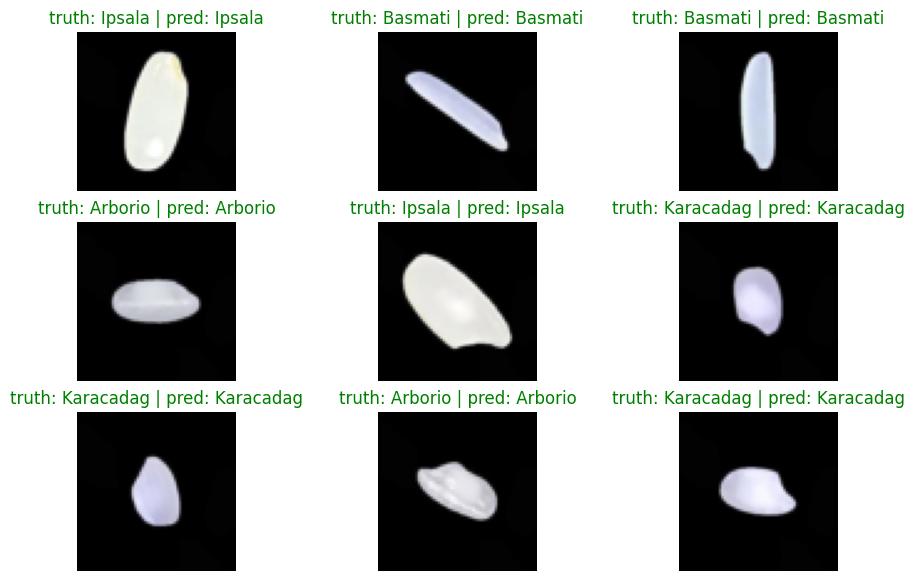

In [85]:
plot_random_predictions(model_0, test_data)

In [80]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [81]:
conf_mat = ConfusionMatrix(task= 'multiclass', num_classes = len(class_names))
conf_mat

MulticlassConfusionMatrix()

In [82]:
y_predictions = []
truth_labels = []
model_0.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = model_0(X)
    y_preds = torch.argmax(torch.softmax(y_logits, dim= 1), dim= 1)
    y_predictions.append(y_preds.cpu())
    truth_labels.append(y.cpu())
y_pred_tensor = torch.cat(y_predictions)
y_truth_labels = torch.cat(truth_labels)

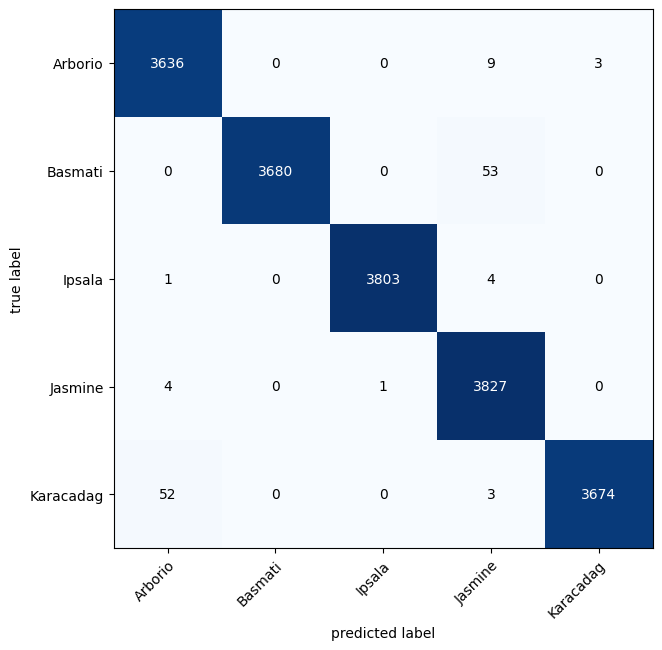

In [83]:
matrix = conf_mat(preds= y_pred_tensor, target= y_truth_labels)
fig, ax = plot_confusion_matrix(conf_mat= matrix.numpy(),
                                class_names= class_names,
                                figsize=(10, 7));